# Color grid predictions

It is generally useful when analysing stellar populations to plot the color of the populations against a background model grid to infer the age and metallicity of the population. With pymiles, it is straightforward to generate such a grid in a few steps.

In [1]:
from pymiles.ssp_models import ssp_models as ssp
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import pymiles.filter as flib

We start for this example with the E-MILES SSP library and with the Kroupa Universal IMF (see the [MILES webpage](http://research.iac.es/proyecto/miles/pages/ssp-models.php)) with the BaSTI isochrones.

In [2]:
emiles = ssp(
    source="EMILES_SSP",
    version="9.1",
    imf_type="ku",
    isochrone="T",
)

As for this exercise we do not need the full EMILES spectral range, we trim the models to save some memory.

In [3]:
emiles.trim(3600*u.AA, 15000*u.AA)

We select the filters that we want to use. We want to use the "g-r" and "i - J" colors, so we get the correspoding filters.

In [4]:
fnames = flib.search("(SLOAN_SDSS.(g|r|i)|2MASS_2MASS.J)")
filts = flib.get(fnames)

We define the constant metallicities and ages for drawing the grid

In [5]:
ctZs = np.array([-2.2, -1, -0.3, 0., 0.25])
ctTs = np.array([3., 5., 7.5, 10.])

And we proceed now to generate the plot. We start by generating the constant metallicity lines

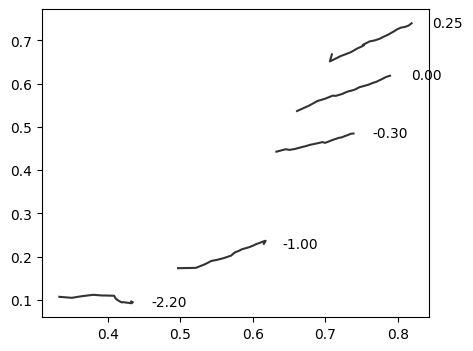

In [6]:
f, ax = plt.subplots(1, figsize=(5,4))

T = np.linspace(ctTs[0], ctTs[-1], 20)
imf = np.full_like(T, 1.3)
for Z in ctZs:
    mags = emiles.interpolate(age=T, met=np.full_like(T,Z), imf_slope=imf).magnitudes(filts)
    gr = mags['SLOAN_SDSS.g'] - mags['SLOAN_SDSS.r']
    iJ = mags['SLOAN_SDSS.i'] - mags['2MASS_2MASS.J']
    ax.plot(gr, iJ, 'k', alpha=0.8)
    ax.text(gr[-1]+0.05, iJ[-1], f"{Z:.2f}", c='k', horizontalalignment='center', verticalalignment='center')

And we repeat the process to add the constant age lines.

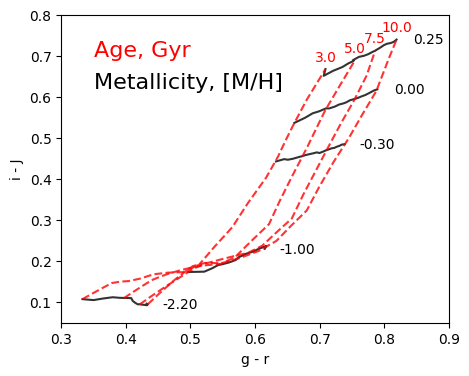

<Figure size 640x480 with 0 Axes>

In [7]:
Z = np.linspace(ctZs[0], ctZs[-1], 20)
for t in ctTs:
    mags = emiles.interpolate(age=np.full_like(Z, t), met=Z, imf_slope=imf).magnitudes(filts)
    gr = mags['SLOAN_SDSS.g'] - mags['SLOAN_SDSS.r']
    iJ = mags['SLOAN_SDSS.i'] - mags['2MASS_2MASS.J']
    ax.plot(gr, iJ, 'r--', alpha=0.8)
    ax.text(gr[-1], iJ[-1]+0.03, f"{t:.1f}", c='r', horizontalalignment='center', verticalalignment='center')

ax.set_xlabel('g - r')
ax.set_ylabel('i - J')
ax.set_xlim(0.3, 0.9)
ax.set_ylim(0.05, 0.8)

ax.text(0.35, 0.7, 'Age, Gyr', c='r', size=16)
ax.text(0.35, 0.62, 'Metallicity, [M/H]', c='k', size=16)

plt.tight_layout()
f

**Note**: we used `interpolate`, rather than `closest`, which is faster. But for this grid it could generate bad-looking lines if we select the grid lines outside of the exact ranges sampled in the library.